# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
xOrg = dataset.iloc[:, 1].values
yOrg = dataset.iloc[:, -1].values

In [3]:
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
x = x.reshape(len(x), 1)
print(x)
y = y.reshape(len(y), 1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scY = StandardScaler()

#fit will calc mean and sd, then trnsfm will use standardization formula
x = scX.fit_transform(x)
y = scY.fit_transform(y)

print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [6]:
from sklearn.svm import SVR
# there are more kernels available with SVR, radial bias function kernel is recommended
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)
# note, regressor fitted to scaled params, ie cannot use .predict directly

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [9]:
# first scale value with scX before passing in to predict
predVal = regressor.predict(scX.transform([[6.5]]))
# this predictedVal will be scaled according to scY
print(predVal)
# reverse the scaling
predValRev = scY.inverse_transform(predVal)
print(predValRev)

[-0.27861589]
[170370.0204065]


## Visualising the SVR results

In [12]:
y_preds = regressor.predict(x)
y_predsRev = scY.inverse_transform(y_preds)
print(y_predsRev)

from sklearn.metrics import r2_score
r2val = r2_score(yOrg, y_predsRev)
print(r2val)

[ 73474.15615697  70786.94584626  88213.00902103 108254.98574956
 122574.52250599 145503.10688572 209410.23132923 330606.89204569
 471671.95587315 557821.75899897]
0.7516001070620797


<function matplotlib.pyplot.show>

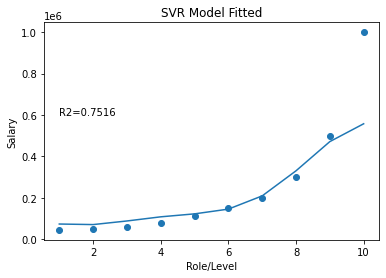

In [13]:
plt.scatter(xOrg, yOrg)
plt.plot(xOrg, y_predsRev)
plt.title('SVR Model Fitted')
plt.xlabel('Role/Level')
plt.ylabel('Salary')
plt.text(1, 600000, 'R2=0.7516')
plt.show



## Visualising the SVR results (for higher resolution and smoother curve)

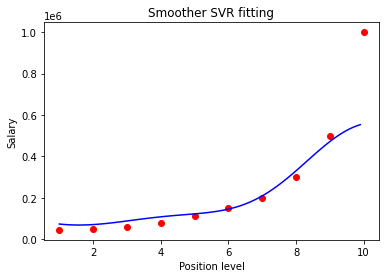

In [14]:
X_grid = np.arange(min(scX.inverse_transform(x)), max(scX.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scX.inverse_transform(x), scY.inverse_transform(y), color = 'red')
plt.plot(X_grid, scY.inverse_transform(regressor.predict(scX.transform(X_grid))), color = 'blue')
plt.title('Smoother SVR fitting')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()